In [1]:
from main import Main
from plot_data import plot_data

Multiple experiments need to be tried out. This notebook will be used to document the whole process.

First starting with the basic FNN on Warehouse.
Parameters: num_fc_units: [640, 256]

log files and model:
output03-29-2021-18-07-36.txt
Warehouse_03-29-2021-18-07-36.pt

command: `main.py --env-name "Warehouse" --yaml-file FNN --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 4 --num-mini-batch 32 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01  --cuda-deterministic`


LSTM network on Warehouse
Parameters: num_fc_units: [640]

IAM network on Warehouse (Didn't have the A matrix yet)

Parameters: num_fc_units: [512, 256], rnn_units: [128]
(num-processes should be equal to num-mini-batch)
command: `main.py --env-name "Warehouse" --yaml-file IAM_static --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 8 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1  --cuda-deterministic`

In [ ]:
args = "--env-name Warehouse --yaml-file IAM_static --recurrent-policy --num-processes 1 --num-steps 8 --num-mini-batch 1 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1"
arg_list = args.split(" ")
main = Main(arg_list)
main.run()

data/output03-29-2021-19-53-54.txt


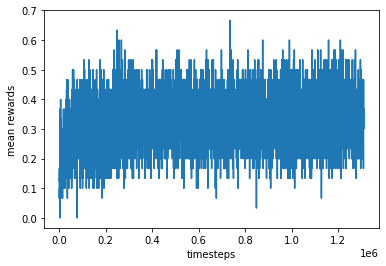

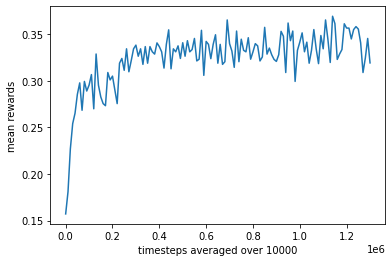

In [5]:
# Trained IAM model: Missing total training time.
# This was one of the first runs. Using a GRU as RNN
plot_data("output03-29-2021-19-53-54.txt")

IAM dynamic network on Breakout

In [6]:
args = "--env-name BreakoutNoFrameskip-v4 --yaml-file IAM_static --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 1 --cuda-deterministic --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1"
arg_list = args.split(" ")
main = Main(arg_list)
main.run()

Log file:  data/output03-31-2021-13-48-03.txt
Starting new run: with args Namespace(algo='ppo', alpha=0.99, clip_param=0.1, cuda=True, cuda_deterministic=False, entropy_coef=0.01, env_name='Breakout-ramNoFrameskip-v4', eps=1e-05, eval_interval=None, gae_lambda=0.95, gail=False, gail_batch_size=128, gail_epoch=5, gail_experts_dir='./gail_experts', gamma=0.99, log_dir='/tmp/gym/', log_interval=30, lr=0.00025, max_grad_norm=0.5, no_cuda=False, num_env_steps=10000000.0, num_mini_batch=1, num_processes=1, num_steps=8, ppo_epoch=4, recurrent_policy=True, save_dir='./trained_models/', save_interval=100, seed=1, use_gae=True, use_linear_lr_decay=True, use_proper_time_limits=False, value_loss_coef=1.0, yaml_file='IAM_static')
And parameters: 
CUDA is available:  True
CUDA disabled
Using Breakout-ramNoFrameskip-v4 environment


FileNotFoundError: Could not find module 'c:\users\gijs-\documents\code_projects\study\deep_learning\venv\lib\site-packages\atari_py\ale_interface\ale_c.dll' (or one of its dependencies). Try using the full path with constructor syntax.

data/output03-31-2021-20-56-12.txt
time_elapsed: 4063 seconds or 67 minutes


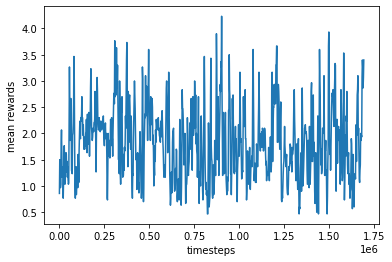

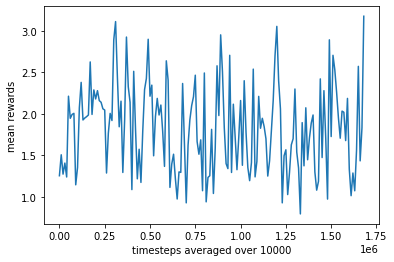

In [2]:
# Trained IAM model with static d set. Which is currently a linear layer which process the input by calling it with input as parameter.
# Doesnt work well :(
plot_data("output03-31-2021-20-56-12.txt")

data/output03-31-2021-22-39-40.txt
time_elapsed: 161 seconds or 2 minutes


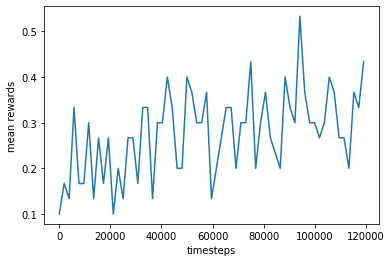

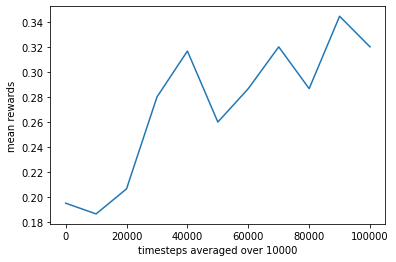

In [4]:
# Redoing IAM network on Warehouse with IAMBase model this time including the A matrix. But still not sure if correctly implemented.
# --env-name Warehouse --yaml-file IAM_static --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 1 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --cuda-deterministic
plot_data("output03-31-2021-22-39-40.txt")

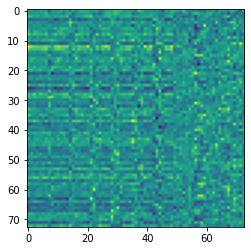

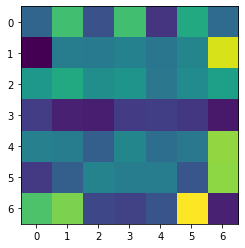

In [14]:
# Loading model and plot weights
import torch
import matplotlib.pyplot as plt
import numpy as np
from reproduction_model import IAMPolicy, IAMBase
# path = 'trained_models\ppo\Warehouse_03-31-2021-23-15-04.pt'
path = 'trained_models\ppo\Warehouse_03-31-2021-23-16-25.pt'
iam_policy: IAMPolicy = torch.load(path)[0]
base: IAMBase = iam_policy.base
# base.static_A_matrix.weight

plt.figure()
agent_pos = base.static_A_matrix.weight.cpu().detach().numpy()
plt.imshow(base.static_A_matrix.weight.cpu().detach().numpy())
plt.show()
item_squares = base.static_A_matrix.bias.cpu().detach().numpy()[49:]
img = np.empty((7,7))
img[0,:] = item_squares[:7]
for i in range(0,5):
    img[i+1,0] = item_squares[7+i*2]
    img[i+1,-1] = item_squares[7+i*2+1]
img[-1,:] = item_squares[24-7:]

for x in range(7):
    for y in range(7):
        img[x,y] += agent_pos[x,y]
plt.imshow(img)
plt.show()